---
title: "Chapter 6: Unsupervised Learning. Part I: PCA"
---


::: {.callout-note icon=false}

## John Naisbitt

"We are drowning in information and starving for knowledge."
::: 
---

- **Machine Learning:** set of methods that can automatically detect patterns in data and then use them to predict future data or perform other kinds of decision making under uncertainty.

- **Types:**
    1. **Predictive or supervised learning** - $p(y_{i}|x_{i},\theta)$: learn a mapping from inputs $x$ to outputs $y$, given a labeled set of input-output pairs $D = \{(x_{i}, y_{i})\}_{i=1}^{N}$ training set.  
       - If $y_{i}$ is categorical → classification.  
       - If $y_{i}$ is real-valued → regression.
    2. **Descriptive or unsupervised learning** - $p(x_{i}|\theta)$: only inputs given, $D = \{(x_{i})\}_{i=1}^{N}$ and the goal is to find patterns in the data. Not a well-defined problem: we are not told what kinds of patterns to look for, no obvious error metric to use, no knowledge about the target data.
   
    3. **Reinforcement learning**: an agent learns to make decisions by interacting with an environment.


---

## 5.1. Unsupervised Learning

::: {.callout-note icon=false}

## Geoffrey Hinton

"When we’re learning to see, nobody’s telling us what the right answers are — we just look. Every so often, your mother says “that’s a dog”, but that’s very little information. You’d be lucky if you got a few bits of information — even one bit per second — that way. The brain’s visual system has $10^{14}$ neural connections. And you only live for $10^9$ seconds. So it’s no use learning one bit per second. You need more like $10^5$ bits per second. And there’s only one place you can get that much information: from the input itself."
::: 
---

### We will study two approaches:

1. **Discovering latent factors:** When handling high-dimensional data, it's often helpful to perform dimensionality reduction by projecting it into a lower-dimensional subspace, latent factors; this is known as dimensionality reduction. (**PCA**)

2. **Discovering clusters:**  Our first goal is to estimate the distribution over the number of clusters, this tells us if there are sub-populations within the data. Our second goal is to estimate which cluster each point belongs to. (**HAC, KMEANS**)

---

![batmanmeme](https://miro.medium.com/v2/resize:fit:508/1*eEZAigUW7zDCK_1DLnmBdw.jpeg)




# 5.2. Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This technique is widely used in data analysis and for making predictive models. Here's a breakdown of its key aspects:

1. **Dimensionality Reduction**: One of the most common uses of PCA is to reduce the dimensionality of a data set while retaining as much of the variability in the dataset as possible. This is achieved by transforming to a new set of variables, the principal components, which are orthogonal (uncorrelated), with the first few retaining most of the variation present in all of the original variables.

2. **Feature Extraction**: PCA can be used to discover or reduce the dimensionality of the data space, identifying the most significant features that explain the majority of the variability in the data.

3. **Visualization**: In datasets with many variables, PCA allows for the visualization of the structure of the data, identifying patterns and possible correlations between variables.

4. **Noise Reduction**: By keeping only the most significant principal components and ignoring the rest, PCA can help in filtering out noise from the data.




Motivation to downsize:

- **High dimensional data**: in machine learning, working with data sets containing a large number of variables is common. These variables represent multiple dimensions of information.
- **Possible correlation and redundancy**: In situations with many variables, some are likely to be highly correlated, leading to redundant information in the dataset.
- **Management and efficiency problem**: The main problem lies in the difficulty to efficiently handle high dimensionality data sets, as this can increase computational complexity, hinder the interpretation of results, and generate less accurate models due to redundancy and noise present in the data.


Dimensionality reduction, and PCA in particular, has been applied in many different areas. Some examples include the following:

- In biology, it is common to use PCA to interpret gene microarray data, to account for the fact that each measurement is usually the result of many genes which are correlated in their behavior by the fact that they belong to different biological pathways.
- In natural language processing, it is common to use a variant of PCA called latent semantic analysis for document retrieval.
- In signal processing (e.g., of acoustic or neural signals), it is common to use ICA (which is a variant of PCA) to separate signals into their different sources.
- In computer graphics, it is common to project motion capture data to a low dimensional space, and use it to create animations.

`Algorithm`


1. Standardize the range of continuous initial variables.
2. Compute the covariance matrix to identify correlations.
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components.
4. Create a feature vector to decide which principal components to keep.
5. Recast the data along the principal components axes.



- The data: $\mathcal{D} = \{ \vec{x}_{n} | n=1,\cdots, N \}$, where $\vec{x}_{n}\in \mathbb{R}^{D}$.

- Centered data: assume $\overline{x} = \frac{1}{N}\sum^{N}_{n=1}\vec{x}_{n} = 0$.

- Approximate $\vec{x}_{n}$ by  $\vec{z}_{n} = z_{n, k} \vec{w}_{k} \in \mathbb{R}^{L}$ (latent vector) with $L<D$.

$$
  \vec{x}_{n} \approx z_{n, 1}\vec{w}_{1}  +  z_{n, 2}\vec{w}_{2} +\cdots + z_{n, L}\vec{w}_{L} = \sum^{L}_{k=1} z_{n, k} \vec{w}_{k}
$$

  where $\vec{w}_{k}$ are the loading vectors and $z_{n, k}$ are the loadings.


Reconstruction error or distortion:
\begin{align}
    \mathcal{L}(\textbf{W}) &= \frac{1}{N} \sum^{N}_{n=1} || \vec{x}_{n} - decode(encode(\vec{x}_{n} ; W); W) ||^{2} \\
    & = \frac{1}{N} \sum^{N}_{n=1} || \textbf{X} - \textbf{ZW}^{T} ||^{2} \\
    &= \frac{1}{N} \sum^{N}_{n=1} || \vec{x}_{n} - \textbf{W}\vec{z}_{n} ||^{2}
\end{align}
We want to minimise this subject to the constraint that $\textbf{W}$ is an orthogonal matrix.




**ENCODING**: 
\begin{align*}
    \mathbf{XW} &= \mathbf{Z}  \quad (N \times D) (D \times L ) = (N \times L )
\end{align*}
where the rows of $\mathbf{Z}$ contain the low dimension versions of the rows of $\mathbf{X}$. 

**DECODING**: 
\begin{align*}
    \mathbf{X} &= \mathbf{ZW^{T}}  \quad (N \times D)  = (N \times L )(L \times D)
\end{align*}
Where $\mathbf{W}$ is the matrix containing the $L$ eigenvectors with the largest eigenvalues of the empirical covariance matrix.

In summary: *PCA finds the directions of maximal variance.*


#### **Example 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
%run data1.py

In [3]:
X.shape

(200, 2)

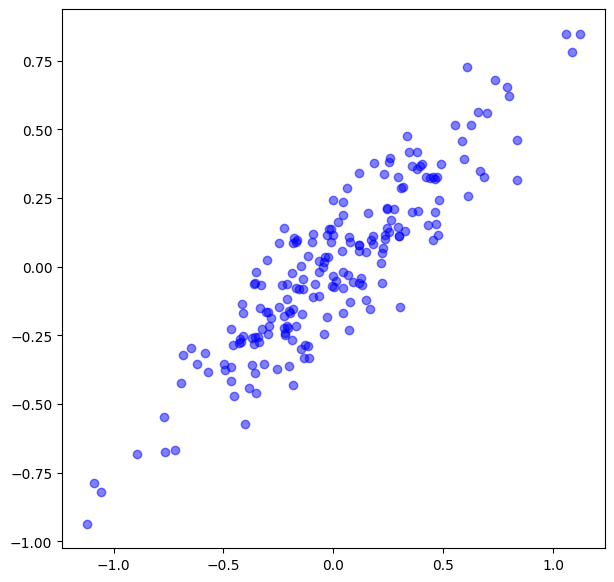

In [4]:
plt.figure(figsize=(7, 7))
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.show()

In [5]:
X_std = StandardScaler().fit_transform(X)

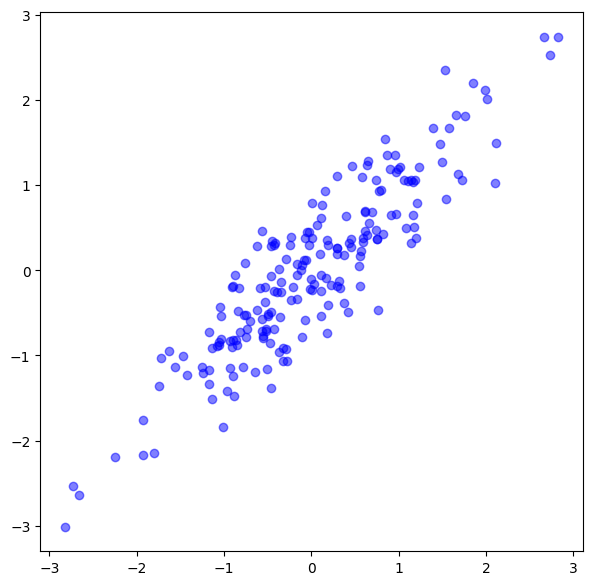

In [6]:
plt.figure(figsize=(7, 7))
plt.plot(X_std[:, 0], X_std[:, 1], "bo", alpha=0.5)
plt.show()

In [7]:
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00502513 0.90575658]
 [0.90575658 1.00502513]]


In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvalues 
[1.9107817  0.09926855]


In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.9107817040282042
0.09926854722807787


In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

[np.float64(95.06138977540313), np.float64(4.938610224596872)]


In [11]:
# projection onto eigenvectors
u1 = eig_vecs[0]
u2 = eig_vecs[1]

In [12]:
X_proj1 = X_std.dot(u1.reshape(-1, 1))
X_proj2 = X_std.dot(u2.reshape(-1, 1))

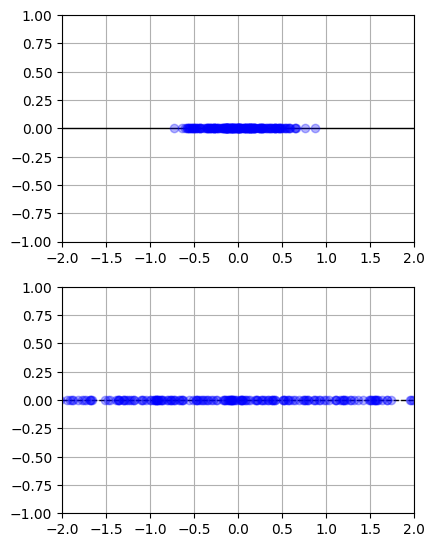

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

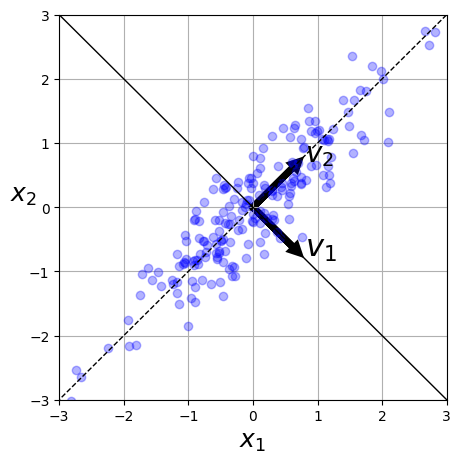

In [14]:
plt.figure(figsize=(5, 5))
plt.plot(X_std[:, 0], X_std[:, 1], "bo", alpha=0.3)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc="k", ec="k")
plt.arrow(0, 0, u2[0], u2[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc="k", ec="k")
plt.plot([-4, 4], [-4 * u1[1] / u1[0], 4 * u1[1] / u1[0]], "k-", linewidth=1)
plt.plot([-4, 4], [-4 * u2[1] / u2[0], 4 * u2[1] / u2[0]], "k--", linewidth=1)
plt.grid(True)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$v_1$", fontsize=22)
plt.text(u2[0] + 0.1, u2[1], r"$v_2$", fontsize=20)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
# Set the axis limits for the plot
plt.axis([-3, 3, -3, 3])
plt.show()

In [15]:
z1 = np.dot(X, u1)
z1.shape

(200,)

In [16]:
z2 = np.dot(X, u2)

In [17]:
df = pd.DataFrame({'z1': z1, 'z2': z2})

print('Data in the Latent Space')

df.head(10)

Data in the Latent Space


,z1,z2
0,0.096788,0.890132
1,0.191603,0.018503
2,0.013343,-0.142536
3,0.055456,-0.050670
4,0.043707,-0.029105
5,-0.190140,-0.635006
6,-0.099918,0.461977
7,0.043883,0.018378
8,0.110087,-0.293515
9,0.185589,0.467912


<Axes: xlabel='z1', ylabel='z2'>

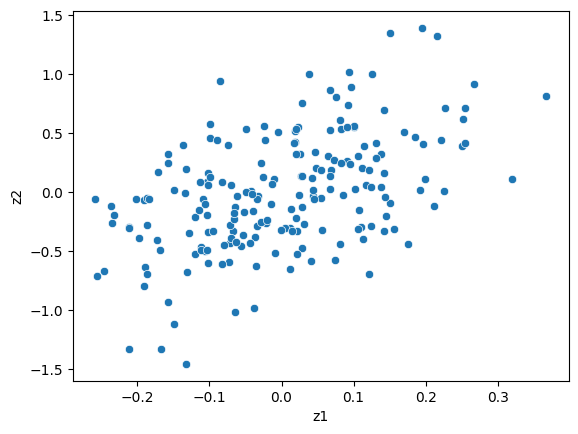

In [18]:
import seaborn as sns

sns.scatterplot(data=df, x='z1', y='z2')

#### **Example 2 (IrisDataset)**

In [19]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

In [20]:
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

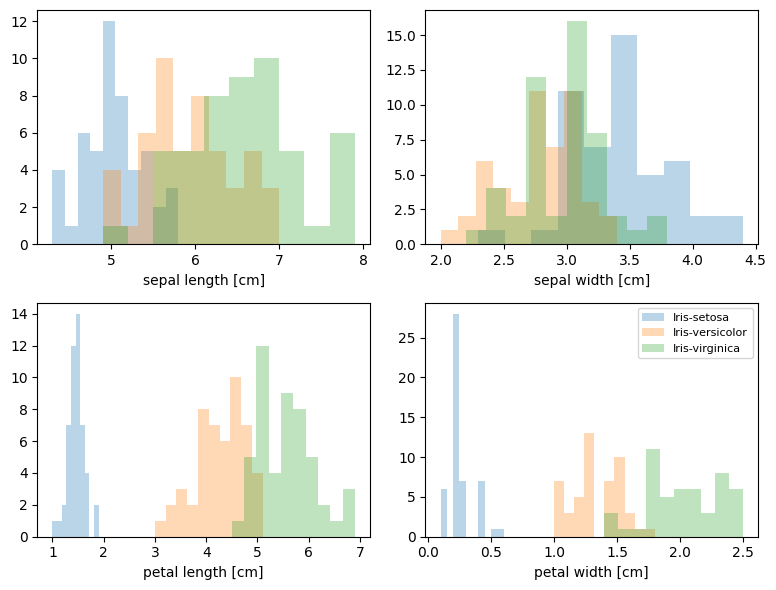

In [22]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}


plt.figure(figsize=(8, 6))
for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab, cnt],
                    label=lab,
                    bins=10,
                    alpha=0.3,)
    plt.xlabel(feature_dict[cnt])
plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [24]:
import numpy as np
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [26]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173418
0.14834222648163986
0.020746013995595867


In [27]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[np.float64(72.77045209380132), np.float64(23.030523267680643), np.float64(3.6838319576273877), np.float64(0.5151926808906304)]
[ 72.77045209  95.80097536  99.48480732 100.        ]


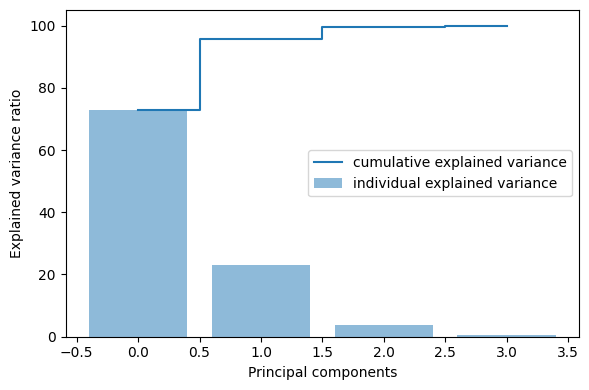

In [28]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We're now at the exciting part: creating the projection matrix to transform the Iris data into a new feature subspace. Despite the sophisticated name, the projection matrix is simply the top k eigenvectors combined. In this case, we're going from a 4-dimensional space down to 2 dimensions by selecting the two eigenvectors with the highest eigenvalues to form our matrix W.

In [29]:
v1 = eig_pairs[0][1]
print(v1)

[ 0.52237162 -0.26335492  0.58125401  0.56561105]


In [30]:
v2 = eig_pairs[1][1]
print(v2)

[-0.37231836 -0.92555649 -0.02109478 -0.06541577]


In [31]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [32]:
Z_loadings = np.dot(X_std, matrix_w)

In [33]:
df_Z_loadings = pd.DataFrame(Z_loadings, columns = ['PCA1', 'PCA2'])
df_Z_loadings.head()

,PCA1,PCA2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


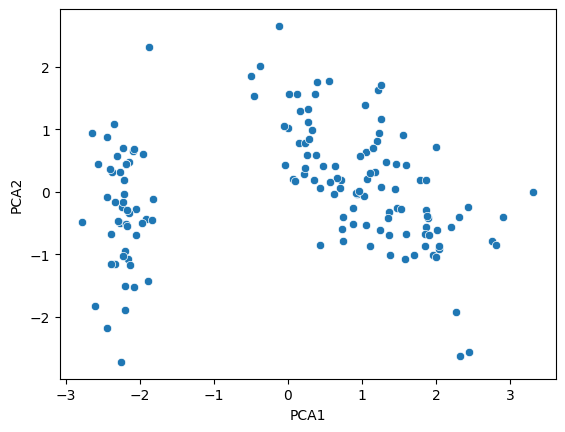

In [34]:
import seaborn as sns

sns.scatterplot(x=df_Z_loadings.iloc[:, 0], y=df_Z_loadings.iloc[:, 1])
plt.show()

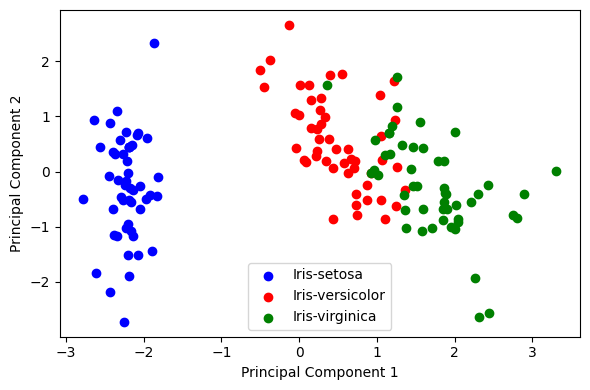

In [35]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                    ('blue', 'red', 'green')):
    plt.scatter(Z_loadings[y==lab, 0],
                Z_loadings[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

`sklearn implementation`

In [36]:
from sklearn.decomposition import PCA 

sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [37]:
exp_variance = pd.DataFrame(data=sklearn_pca.explained_variance_ratio_, index = ['PCA' + str(n_pca + 1) for n_pca in range(sklearn_pca.n_components)], columns=['Exp_variance'])
exp_variance['cum_Exp_variance'] = exp_variance['Exp_variance'].cumsum()
exp_variance

,Exp_variance,cum_Exp_variance
PCA1,0.727705,0.727705
PCA2,0.230305,0.958010
PCA3,0.036838,0.994848
PCA4,0.005152,1.000000


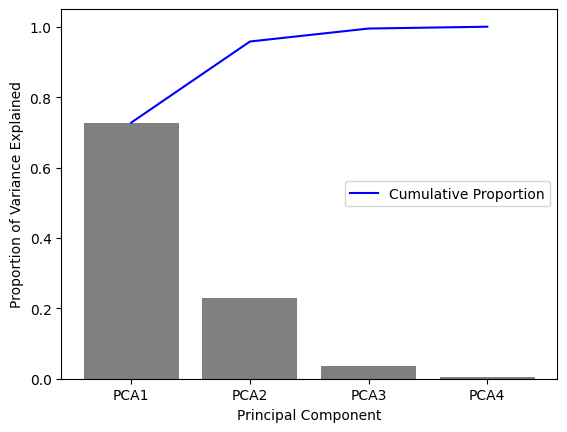

In [38]:
sns.barplot(data=exp_variance, x=exp_variance.index, y='Exp_variance', color='gray')
sns.lineplot(data=exp_variance, x=exp_variance.index, y='cum_Exp_variance', color='blue', label='Cumulative Proportion')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.legend()
plt.show()

In [39]:
# Print the PCs
loadings = pd.DataFrame(sklearn_pca.components_.T * np.sqrt(sklearn_pca.explained_variance_), columns=['PC' + str(pca + 1) for pca in range(sklearn_pca.n_components)])
loadings

,PC1,PC2,PC3,PC4
0,0.894210,0.358549,0.277701,-0.037736
1,-0.450818,0.891328,-0.093219,0.017880
2,0.995007,0.020315,-0.054265,0.115394
3,0.968229,0.062997,-0.244110,-0.075409


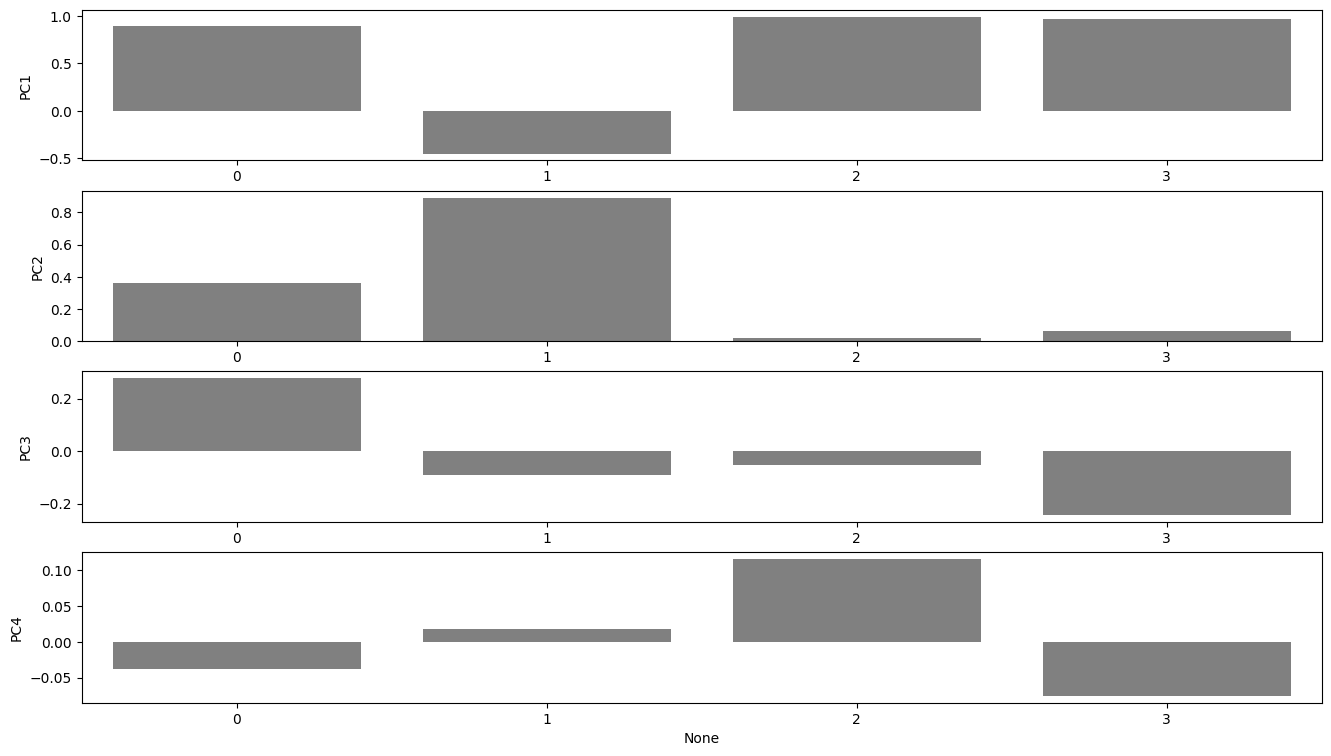

In [40]:
# Plot the 3 first PCs
# fig, axes = plt.subplots(loadings.shape[1], 1, figsize=(16,9))
fig, axes = plt.subplots(4, 1, figsize=(16,9))
PC = 0
for ax in axes.ravel():
    sns.barplot(data=loadings, x=loadings.index, y=loadings.columns.values.tolist()[PC], color='gray', ax=ax)
    PC += 1

In [41]:
from sklearn import datasets

# load features and targets separately
iris = datasets.load_iris()

# Feature names before PCA
feature_names = iris.feature_names

# set index to name of features in
loadings['feature_names'] = feature_names
loadings = loadings.set_index('feature_names')

In [42]:
loadings

,PC1,PC2,PC3,PC4
feature_names,,,,
sepal length (cm),0.894210,0.358549,0.277701,-0.037736
sepal width (cm),-0.450818,0.891328,-0.093219,0.017880
petal length (cm),0.995007,0.020315,-0.054265,0.115394
petal width (cm),0.968229,0.062997,-0.244110,-0.075409


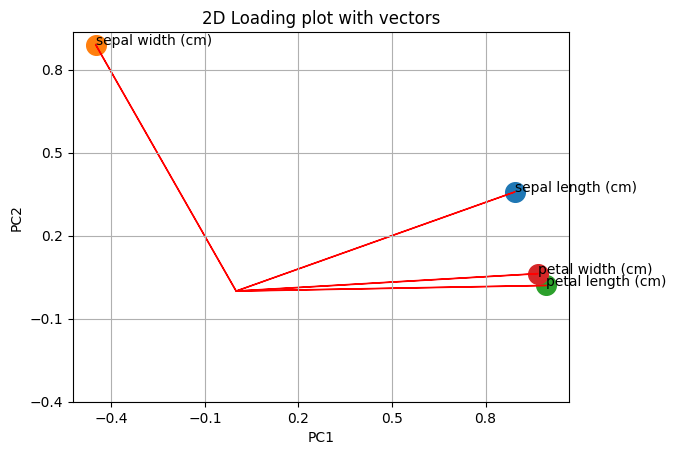

In [43]:
# Get the loadings of x and y axes
xs = loadings['PC1']
ys = loadings['PC2']
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs.iloc[i], # length of the arrow along x
        ys.iloc[i], # length of the arrow along y
        color='r', 
        head_width=0
        )
    plt.text(xs.iloc[i], ys.iloc[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.4, 0.8, num=5)
yticks = np.linspace(-0.4, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

 
# Show plot
plt.title('2D Loading plot with vectors')
plt.grid()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.88889


Let's try this again, but, this time, let's reduce the dimensionality to 2 dimensions.

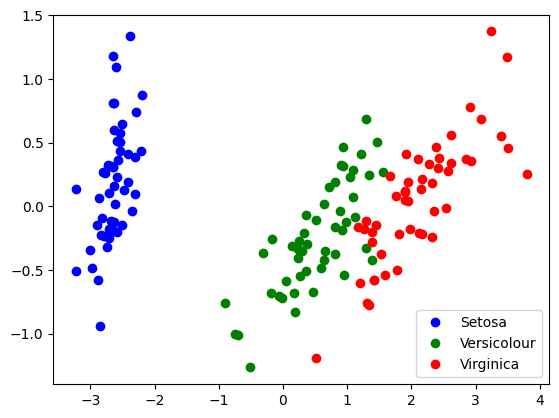

In [46]:
# Using PCA from sklearn PCA

pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [47]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


In [48]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


---

#### How to choose the best latent dimension?

#### **Example 2 (MNIST)**

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
import numpy as np

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)  # Convert labels to integers

In [3]:
# MNIST is already pre-split (first 60k are train, last 10k are test)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [5]:
from sklearn.preprocessing import StandardScaler
# Scale data using training set statistics only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Important: don't fit on test data

In [6]:
X_train_scaled.shape

(60000, 784)

In [7]:
X_rank = np.linalg.matrix_rank(X_train_scaled)
print('Rank of X_train:', X_rank)
K_linspace = np.linspace(1, 0.75 * X_rank, 10, dtype=int)
Ks = np.unique(np.append([1, 5, 10, 20], K_linspace))

RMSE_train = np.arange(len(Ks))
RMSE_test = np.arange(len(Ks))

Ks 

Rank of X_train: 712


array([  1,   5,  10,  20,  60, 119, 178, 237, 297, 356, 415, 474, 534])

In [10]:
from sklearn.decomposition import PCA

for index, K in enumerate(Ks):
    pca = PCA(n_components=K)

    Xtrain_pca = pca.fit_transform(X_train)
    Xtrain_proj = pca.inverse_transform(Xtrain_pca)
    RMSE_train[index] = mean_squared_error(X_train_scaled, Xtrain_proj)

    Xtest_pca = pca.transform(X_test)
    Xtest_proj = pca.inverse_transform(Xtest_pca)
    RMSE_test[index] = mean_squared_error(X_test, Xtest_proj)

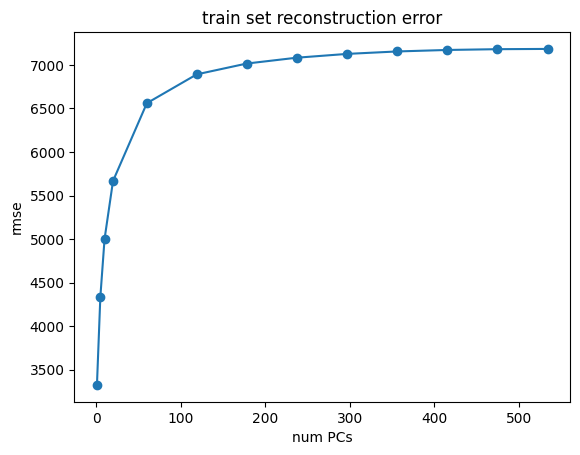

In [12]:
import matplotlib.pyplot as plt

# Fraction of variance explained
pca = PCA(n_components=X_rank)
X_transformed = pca.fit_transform(X_train)
evals = pca.explained_variance_  # eigenvalues in descending order

fraction_var = np.cumsum(evals[0:50] / np.sum(evals))

fig, ax = plt.subplots()
xs = Ks
ys = RMSE_train
plt.title("train set reconstruction error")
plt.xlabel("num PCs")
plt.ylabel("rmse")
ax.plot(xs, ys, marker="o")
plt.show()

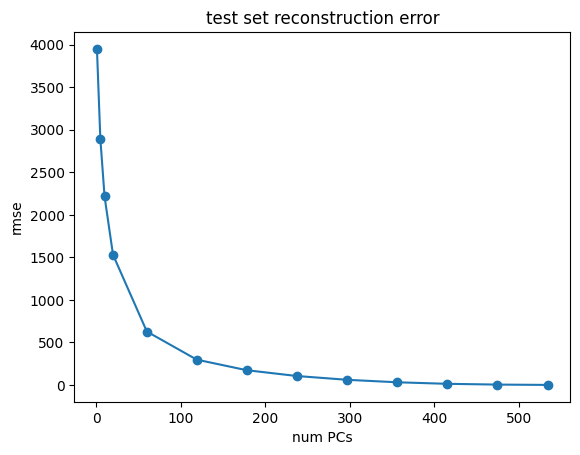

In [13]:
fig, ax = plt.subplots()
xs = Ks
ys = RMSE_test
plt.title("test set reconstruction error")
plt.xlabel("num PCs")
plt.ylabel("rmse")
ax.plot(xs, ys, marker="o")
plt.show()

In [16]:
import pandas as pd

exp_variance = pd.DataFrame(data=pca.explained_variance_ratio_, index = ['PC' + str(n_pca + 1) for n_pca in range(pca.n_components)], columns=['Exp_variance'])
exp_variance['cum_Exp_variance'] = exp_variance['Exp_variance'].cumsum()
exp_variance = exp_variance.head(20)

In [17]:
exp_variance.head()

,Exp_variance,cum_Exp_variance
PC1,0.097047,0.097047
PC2,0.070959,0.168006
PC3,0.061691,0.229697
PC4,0.053894,0.283591
PC5,0.048688,0.332279


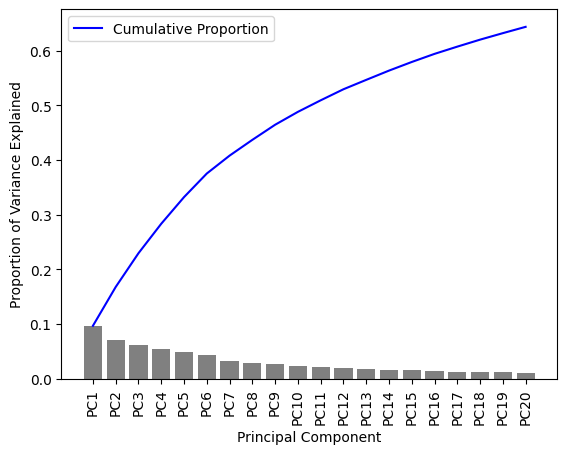

In [20]:
import seaborn as sns 

sns.barplot(data=exp_variance, x=exp_variance.index, y='Exp_variance', color='gray')
sns.lineplot(data=exp_variance, x=exp_variance.index, y='cum_Exp_variance', color='blue', label='Cumulative Proportion')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Log_likelihood

In [21]:
from scipy.stats import multivariate_normal

def log_likelihood(evals):

    Lmax = len(evals)
    ll = np.arange(0.0, Lmax)

    for L in range(Lmax):

        group1 = evals[0 : L + 1]  # Divide Eigenvalues in two groups
        group2 = evals[L + 1 : Lmax]

        mu1 = np.mean(group1)
        mu2 = np.mean(group2)

        # eqn (20.30)
        sigma = (np.sum((group1 - mu1) ** 2) + np.sum((group2 - mu2) ** 2)) / Lmax

        ll_group1 = np.sum(multivariate_normal.logpdf(group1, mu1, sigma))
        ll_group2 = np.sum(multivariate_normal.logpdf(group2, mu2, sigma))

        ll[L] = ll_group1 + ll_group2  
    return ll

In [22]:
ll = log_likelihood(evals)

/Users/vallevaro/Library/CloudStorage/GoogleDrive-m.varo@deusto.es/Mi unidad/ML2/bigdataenv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vallevaro/Library/CloudStorage/GoogleDrive-m.varo@deusto.es/Mi unidad/ML2/bigdataenv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


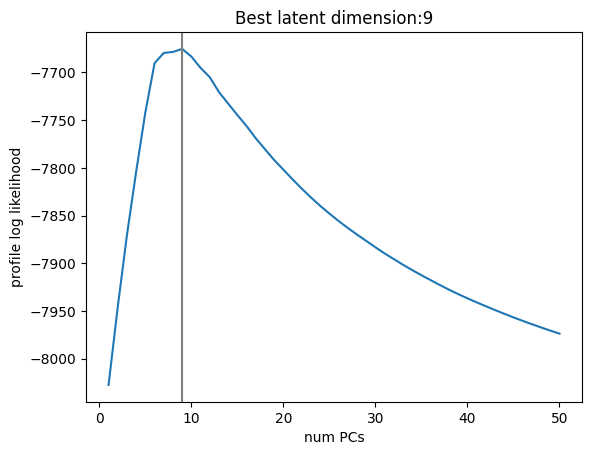

In [23]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = ll[0:50]

plt.xlabel("num PCs")
plt.ylabel("profile log likelihood")
plt.plot(xs, ys)
idx = np.argmax(ys)
plt.axvline(xs[idx], c='grey')
plt.title('Best latent dimension:' + str(int(xs[idx])))
plt.show()

/var/folders/j7/krgprqps37x2qnm719kc393r0000gn/T/ipykernel_16633/1099725588.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


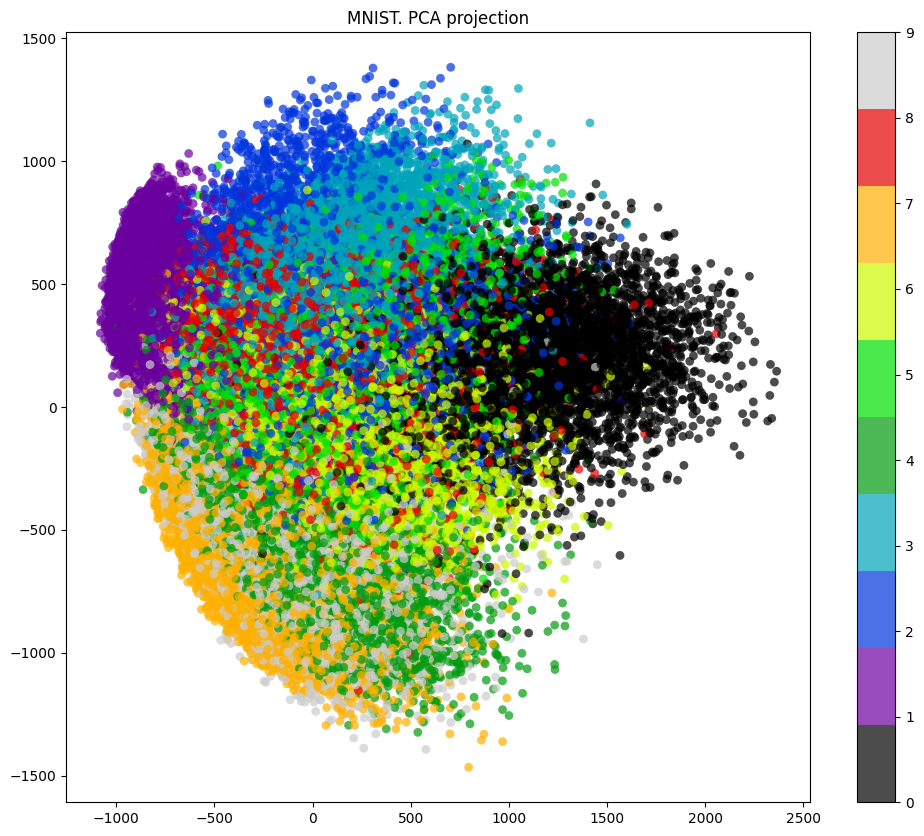

In [25]:
num_latent_dim = 9

pca = PCA(n_components=num_latent_dim)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

---

#### **(Extra) T-SNE (non-parametric, nonlinear dimensionality reduction)**

/var/folders/j7/krgprqps37x2qnm719kc393r0000gn/T/ipykernel_16633/2648585048.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


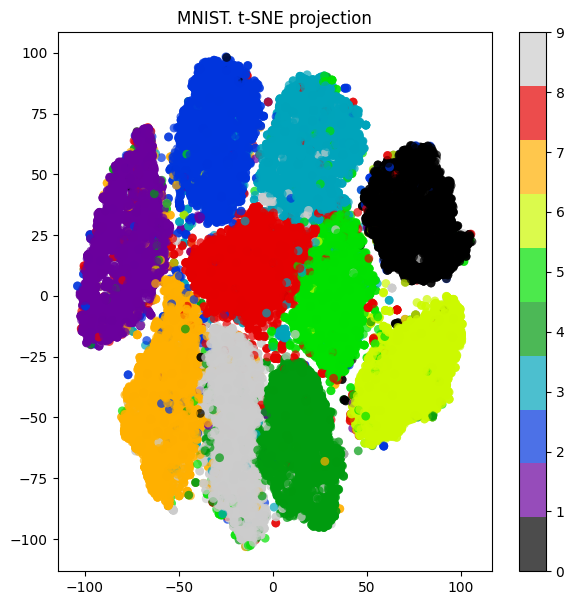

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7,7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

---

#### **Example 4 (Eigenfaces)**

In [29]:
from sklearn.datasets import fetch_olivetti_faces

In [30]:
np.random.seed(0)
# load the faces (value from 0 to 1)
faces = fetch_olivetti_faces()
img = faces['images']
X = faces['data']
target = faces['target']
y = np.ravel(np.repeat(np.arange(1, 41), 10))

In [31]:
h, w, n = 64, 64, len(img)

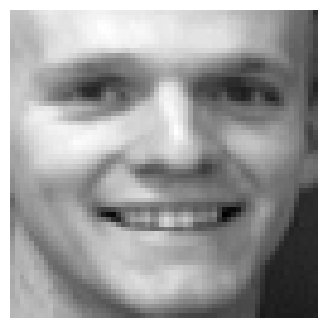

In [32]:
plt.figure(figsize=(4, 4)) 
plt.imshow(X[42].reshape(h, w), cmap='gray')
plt.axis('off')
plt.show()

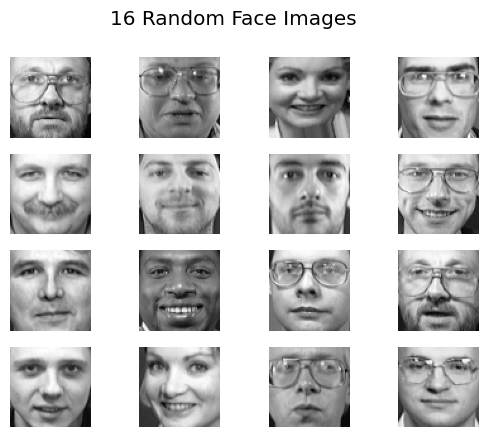

In [33]:
# Select 16 random faces
val = np.random.choice(n, 16, replace=False)
fig, axs = plt.subplots(4, 4)
fig.suptitle("16 Random Face Images ", fontsize="x-large")
for i in range(16):
    r, c = int(i / 4), i % 4
    axs[r, c].imshow(X[val[i]].reshape(h, w), cmap='gray')
    axs[r, c].axis('off')

In [34]:
print('Performing PCA')
mu = np.mean(X, axis=0)
XC = X - mu

pca = PCA()
pca.fit(XC)
V = pca.components_
Z = np.dot(XC, V.T)

Performing PCA


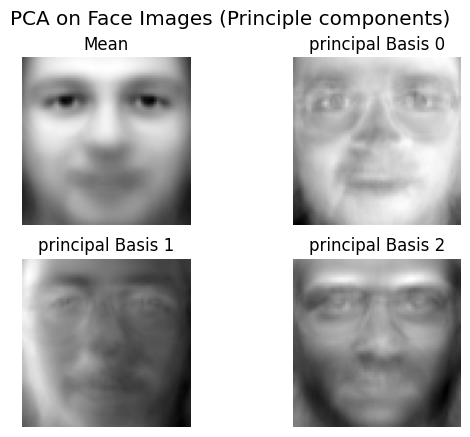

In [35]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Principle components) ", fontsize="x-large")
for i in range(4):
    r, c = int(i / 2), i % 2
    if r == 0 and c == 0:
        # mu plot
        axs[r, c].imshow(mu.reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('Mean')
    else:
        # plots the first three Eigenfaces
        axs[r, c].imshow(V[i - 1].reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('principal Basis {}'.format(i - 1))

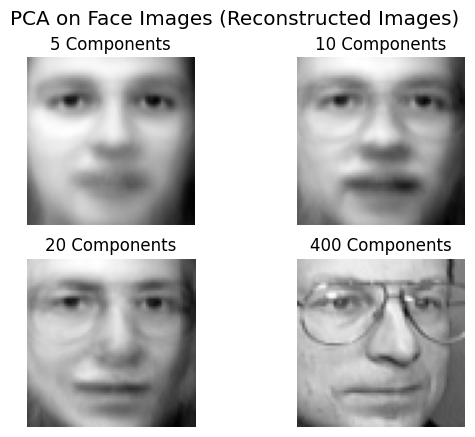

In [36]:
from numpy.linalg import matrix_rank
ndx = 125
Ks = [5, 10, 20, matrix_rank(X)]
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Reconstructed Images) ", fontsize="x-large")
count = 0
for k in Ks:
    Xrecon = np.dot(Z[np.newaxis, ndx, :k], V[:k, :]) + mu
    r, c = int(count / 2), count % 2
    axs[r, c].imshow(Xrecon.reshape(64, 64), cmap='gray')
    axs[r, c].axis('off')
    axs[r, c].set_title('{} Components'.format(k))
    count += 1

Text(0.5, 0, 'K')

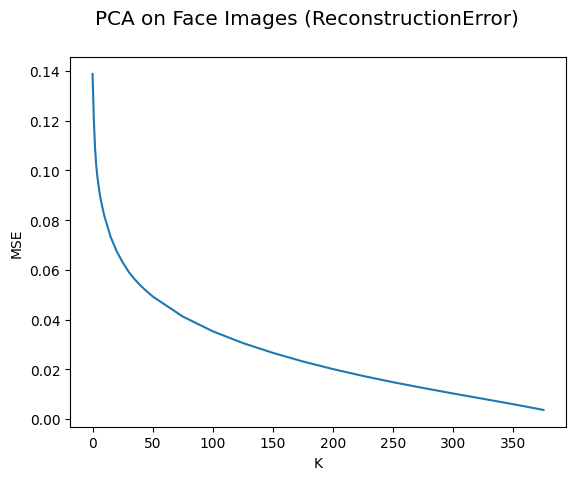

In [37]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("PCA on Face Images (ReconstructionError) ", fontsize="x-large")
Ks = []
Ks.extend(list(np.arange(0, 10, 1)))
Ks.extend(list(np.arange(10, 50, 5)))
Ks.extend(list(np.arange(50, matrix_rank(X), 25)))
mse = np.zeros(len(Ks))
count = 0
for k in Ks:
    Xrecon = np.dot(Z[:, :k], V[:k, :]) + mu
    err = (Xrecon - X)
    mse[count] = np.sqrt(np.mean(err ** 2))
    count += 1

axs.plot(Ks, mse, '-')
axs.set_ylabel('MSE')
axs.set_xlabel('K')

In [38]:
elbow_index = np.argmin(np.abs(np.diff(mse))) + 10
elbow_value = Ks[elbow_index]
print(elbow_value)

75


In [39]:
exp_variance = pd.DataFrame(data=pca.explained_variance_ratio_, index = ['PC' + str(n_pca + 1) for n_pca in range(len(pca.components_))], columns=['Exp_variance'])
exp_variance['cum_Exp_variance'] = exp_variance['Exp_variance'].cumsum()
exp_variance

,Exp_variance,cum_Exp_variance
PC1,2.381273e-01,0.238127
PC2,1.399396e-01,0.378067
PC3,7.968620e-02,0.457753
PC4,4.998335e-02,0.507736
PC5,3.609848e-02,0.543835
...,...,...
PC396,2.176393e-05,0.999942
PC397,2.141459e-05,0.999964
PC398,2.002384e-05,0.999984
PC399,1.639760e-05,1.000000


In [40]:
threshold = 0.99
idx_variance = np.where(exp_variance['cum_Exp_variance'].values > threshold)[0][0]

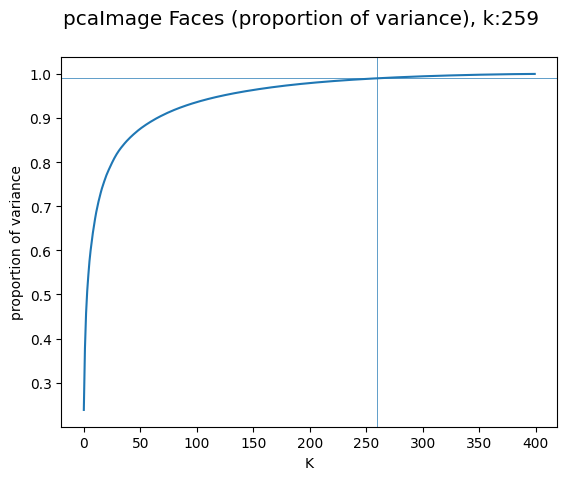

In [41]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("pcaImage Faces (proportion of variance), k:" + str(idx_variance), fontsize="x-large")
exp_var = np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)
axs.plot(exp_var, '-')
axs.set_ylabel('proportion of variance')
axs.set_xlabel('K')
axs.axhline(threshold, linewidth=0.5)
axs.axvline(idx_variance, linewidth=0.5)

In [42]:
# Print the PCs
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=['PC' + str(pca + 1) for pca in range(len(pca.components_))])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC391,PC392,PC393,PC394,PC395,PC396,PC397,PC398,PC399,PC400
0,0.018192,0.095136,0.003407,0.002236,0.040294,0.045993,0.063220,0.008615,-0.031474,-0.022570,...,-0.000024,-0.000226,-0.000157,0.000232,0.000306,-0.000062,0.000912,0.000089,0.000618,-1.622010e-07
1,0.030859,0.110765,-0.000818,-0.003560,0.039868,0.049476,0.054288,0.004283,-0.044307,-0.025519,...,-0.000177,-0.000332,0.000271,-0.001201,0.000183,0.000608,0.000120,0.000819,0.001051,8.144941e-08
2,0.040524,0.125931,-0.000497,-0.023231,0.037452,0.045481,0.041878,-0.003566,-0.047526,-0.024320,...,-0.001146,-0.000136,-0.000438,-0.000619,0.000794,-0.000615,-0.000674,0.000603,-0.000340,-7.719754e-08
3,0.046055,0.131825,0.002662,-0.037110,0.033837,0.043307,0.032946,-0.009723,-0.039023,-0.020619,...,0.000788,-0.000300,0.000105,-0.000411,0.000188,-0.000747,-0.000018,0.000013,-0.000081,2.639263e-07
4,0.049548,0.128901,0.007008,-0.047862,0.034002,0.040088,0.021786,-0.012677,-0.032475,-0.018161,...,-0.000812,-0.000932,0.000145,0.001438,-0.000454,0.000307,-0.000278,0.000147,0.000017,-2.010980e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.007136,-0.101789,-0.049327,0.047408,0.058556,-0.026847,0.023267,-0.018011,0.021293,0.036742,...,0.001970,-0.002459,0.001333,0.003186,-0.000882,-0.001315,-0.001985,-0.000557,0.001439,-3.651982e-10
4092,-0.000830,-0.104869,-0.044323,0.050768,0.071195,-0.030648,0.026428,-0.003912,0.028878,0.032494,...,0.000982,-0.000889,0.000335,0.000186,-0.000066,-0.000348,0.000103,-0.000896,-0.000621,1.130890e-08
4093,-0.000804,-0.098584,-0.038702,0.058525,0.071722,-0.025854,0.032020,-0.005096,0.033739,0.027627,...,-0.001623,0.001311,-0.000366,-0.000233,-0.000205,0.000621,0.001859,-0.000507,0.000057,-8.663843e-09
4094,-0.014670,-0.090549,-0.034424,0.055322,0.067725,-0.025878,0.033360,-0.005139,0.035561,0.023040,...,-0.000080,0.001315,0.001265,-0.000586,0.002590,0.001821,0.000407,-0.002328,0.000450,1.469048e-08


---

#### **Example 5 (Countries)**

In [43]:
# Import data
df = pd.read_csv('Countries.dat', sep=' ')
df.head()

,Country,GDP,ElectricityConsumption,TradeBalance,ExternalDebt,PopulationIncrease,LifeExpectancy,InfantMortality,InternetUsers
1,Afghanistan,0.808025,0.033791,56.824550,1.204340,92.771084,22.074408,75.453351,0.056359
2,Albania,6.937866,6.191515,55.751500,1.672524,40.562249,79.774521,19.195795,0.131505
3,Algeria,13.903594,2.730120,58.652120,4.625188,57.228916,75.535513,19.495401,0.112718
4,Angola,1.365283,0.499132,59.667905,6.117167,66.064257,4.825254,100.000000,0.225437
5,Argentina,34.522151,8.348090,57.031369,24.186137,45.983936,87.508455,7.505913,4.527522


In [44]:
df.shape

(131, 9)

In [45]:
#Store in X variable clean data for PCA analysis
X = df.drop('Country', axis=1) 
y = df[['Country']]

In [46]:
# Preprocessing the values to perform PCA
numeric_features = X.select_dtypes(include=['int64','float64']).columns.values.tolist()
X_std = StandardScaler().fit_transform(X=X)


In [47]:
## PCA -----------------------------------------------------------
pca = PCA(n_components=8)

In [48]:
X_pca = pca.fit_transform(X_std)

In [49]:
exp_variance = pd.DataFrame(data=pca.explained_variance_ratio_, index = ['PC' + str(n_pca + 1) for n_pca in range(pca.n_components)], columns=['Exp_variance'])
exp_variance['cum_Exp_variance'] = exp_variance['Exp_variance'].cumsum()
exp_variance

,Exp_variance,cum_Exp_variance
PC1,0.532702,0.532702
PC2,0.177932,0.710634
PC3,0.095965,0.806599
PC4,0.078752,0.885351
PC5,0.063791,0.949142
PC6,0.023525,0.972667
PC7,0.015492,0.988160
PC8,0.011840,1.000000


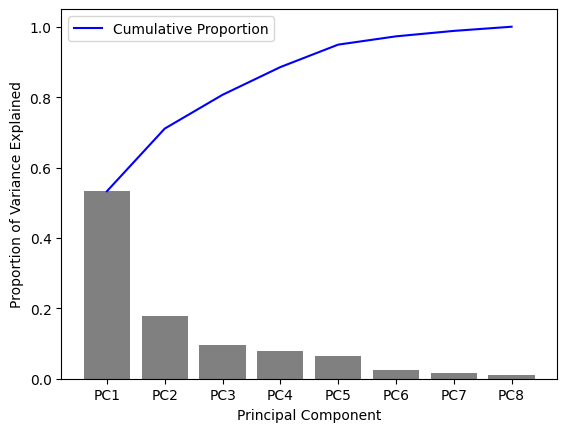

In [50]:
sns.barplot(data=exp_variance, x=exp_variance.index, y='Exp_variance', color='gray')
sns.lineplot(data=exp_variance, x=exp_variance.index, y='cum_Exp_variance', color='blue', label='Cumulative Proportion')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.legend()
plt.show()

In [51]:
# Print the PCs
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns=['PC' + str(pca + 1) for pca in range(pca.n_components)], index=numeric_features)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
GDP,0.912467,0.033529,-0.245906,-0.144062,-0.090099,0.051263,0.280457,0.057844
ElectricityConsumption,0.859669,0.251464,-0.285456,0.096476,-0.032668,0.302570,-0.144621,-0.033229
TradeBalance,0.281239,0.772230,0.169572,0.539431,0.039554,-0.088477,0.052203,0.019999
ExternalDebt,0.610482,0.406753,0.291760,-0.416524,0.458400,-0.014339,-0.024258,-0.003855
PopulationIncrease,-0.469235,0.663879,0.126705,-0.352539,-0.451110,0.017040,-0.003597,-0.051326
LifeExpectancy,0.815121,-0.232837,0.423729,-0.011194,-0.254320,-0.008608,-0.086658,0.192673
InfantMortality,-0.824945,0.328869,-0.379245,-0.086857,0.125994,0.012797,-0.039882,0.223616
InternetUsers,0.840149,0.071818,-0.422328,-0.091489,-0.096541,-0.294806,-0.113558,-0.028745


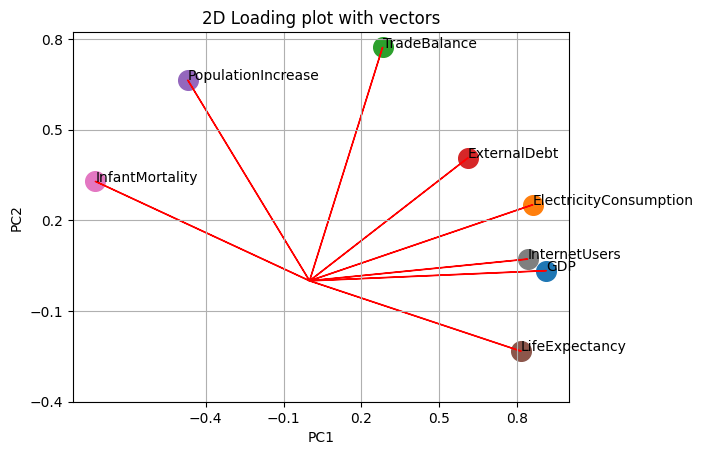

In [52]:
# Get the loadings of x and y axes
xs = loadings['PC1']
ys = loadings['PC2']
feature_names = loadings.index.values
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs.iloc[i], ys.iloc[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs.iloc[i], # length of the arrow along x
        ys.iloc[i], # length of the arrow along y
        color='r', 
        head_width=0
        )
    plt.text(xs.iloc[i], ys.iloc[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.4, 0.8, num=5)
yticks = np.linspace(-0.4, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

 
# Show plot
plt.title('2D Loading plot with vectors')
plt.grid()
plt.show()

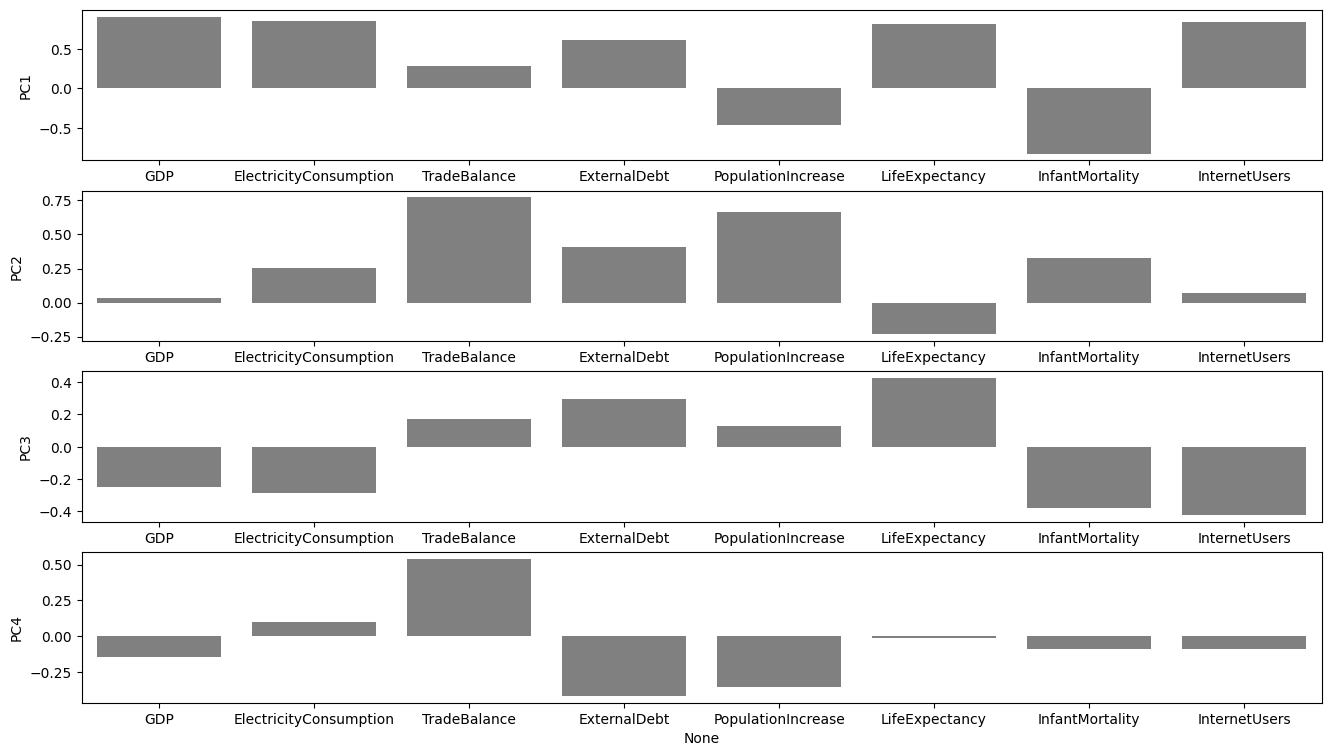

In [53]:
# Plot the 3 first PCs
# fig, axes = plt.subplots(loadings.shape[1], 1, figsize=(16,9))
fig, axes = plt.subplots(4, 1, figsize=(16,9))
PC = 0
for ax in axes.ravel():
    sns.barplot(data=loadings, x=loadings.index, y=loadings.columns.values.tolist()[PC], color='gray', ax=ax)
    PC += 1

<Axes: xlabel='GDP', ylabel='TradeBalance'>

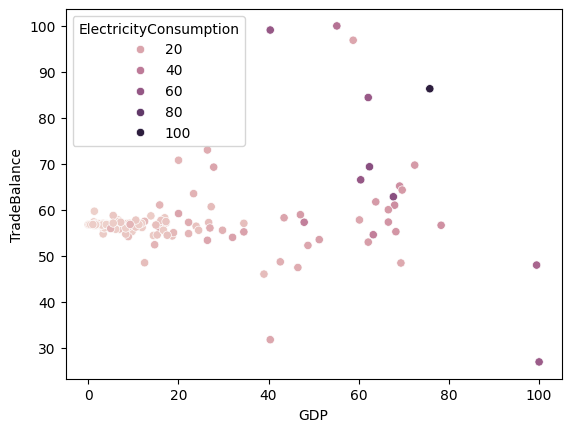

In [54]:
sns.scatterplot(df, x='GDP', y='TradeBalance', hue='ElectricityConsumption')

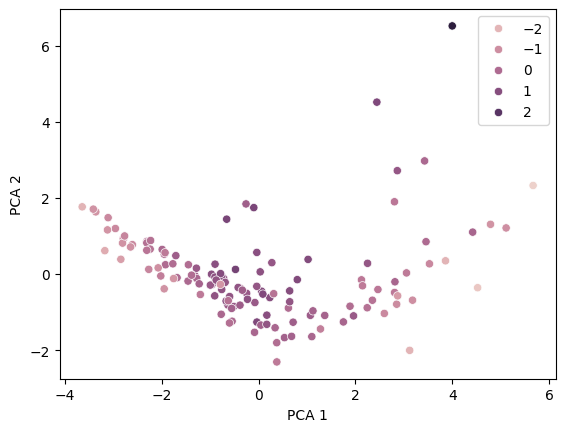

In [55]:
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=X_pca[:,2])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [56]:
threshold = 0.94
idx_variance = np.where(exp_variance['cum_Exp_variance'].values >= threshold)[0][0]

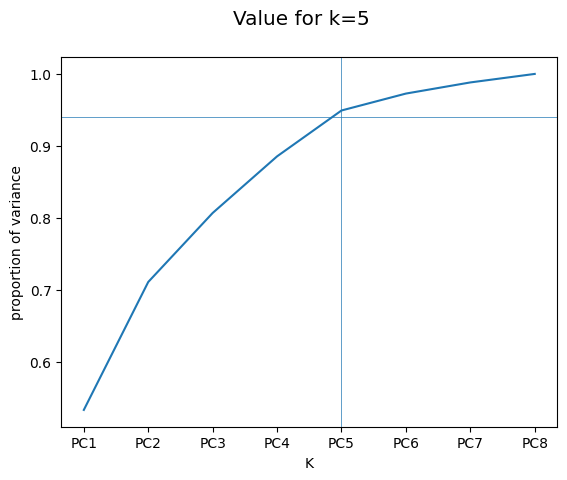

In [57]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("Value for k=" + str(idx_variance+1), fontsize="x-large")
exp_var = exp_variance['cum_Exp_variance']
axs.plot(exp_var, '-')
axs.set_ylabel('proportion of variance')
axs.set_xlabel('K')
axs.axhline(threshold, linewidth=0.5)
axs.axvline(idx_variance, linewidth=0.5)

# References

- "Pattern Recognition and Machine Learning" by Christopher M. Bishop
- "Machine Learning: A Probabilistic Perspective" by Kevin P. Murphy
- "Data Clustering: Algorithms and Applications" by Charu C. Aggarwal 